In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [17]:
data_path0 = "../../data_3eig/02_processed/02_npt/prod_0/"
data_path1 = "../../data_3eig/02_processed/02_npt/prod_1/"

In [13]:
os.system("cat " + data_path + "01_prod1_header.txt")

# This file was created Wed Dec  4 11:58:11 2024
# Created by:
#          :-) GROMACS - gmx energy, 2023.1-Ubuntu_2023.1_2ubuntu1 (-:
# 
# Executable:   /usr/bin/gmx
# Data prefix:  /usr
# Working dir:  /home/ngoc-huyen/cbp_final/data_3eig/01_raw/02_NPT/01_npt_1
# Command line:
#   gmx energy -f step5_prod_1.edr -o 01_restricted_raw.xvg
# gmx energy is part of G R O M A C S:
#
# S  C  A  M  O  R  G
#
@    title "GROMACS Energies"
@    xaxis  label "Time (ps)"
@    yaxis  label "(K), (bar), (), (kg/m^3)"
@TYPE xy
@ view 0.15, 0.15, 0.75, 0.85
@ legend on
@ legend box on
@ legend loctype view
@ legend 0.78, 0.8
@ legend length 2
@ s0 legend "Temperature"
@ s1 legend "Pressure"
@ s2 legend "Constr. rmsd"
@ s3 legend "Density"


0

In [20]:
tem_df0 = pd.read_csv(data_path0 + "00_prod0.xvg", header = None, sep = " ", skipinitialspace=True)
tem_df1 = pd.read_csv(data_path1 + "01_prod1.xvg", header = None, sep = " ", skipinitialspace=True)
#tem_df = tem_df.tail(-5000)

In [42]:
# concatenate 2 df
import pandas as pd
tem_df = pd.concat([tem_df0, tem_df1])
tem_df.index = np.arange(40002)
tem_df

,0,1,2,3,4
0,0.0,315.142700,491.935303,0.000003,1028.969238
1,2.0,311.339264,-22.572472,0.000003,1030.180054
2,4.0,308.726471,146.760361,0.000003,1027.601196
3,6.0,311.265808,-229.563980,0.000003,1026.123291
4,8.0,311.625854,9.897235,0.000003,1025.858887
...,...,...,...,...,...
39997,39992.0,309.295013,-57.970440,0.000003,1032.070312
39998,39994.0,311.766846,322.354065,0.000003,1032.970215
39999,39996.0,310.532074,-9.464728,0.000003,1033.838623
40000,39998.0,307.804108,-14.839184,0.000003,1031.584961


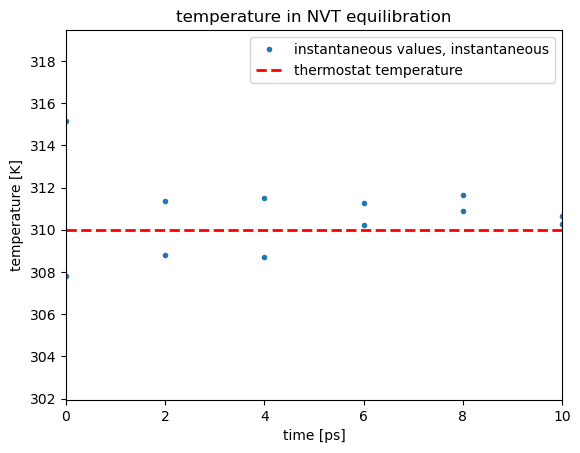

In [53]:
plt.plot(tem_df[0], tem_df[1], ".", label = "instantaneous values, instantaneous")
# plt.plot(tem_df[0], tem_df[1].expanding().mean(), label = "cumulative average")
plt.title("temperature in NVT equilibration")
plt.xlabel("time [ps]")
plt.ylabel("temperature [K]")
plt.axhline(y=310, color='r', linestyle='--', linewidth=2, label = "thermostat temperature")
plt.xlim(0, 10)
plt.legend()
plt.show()

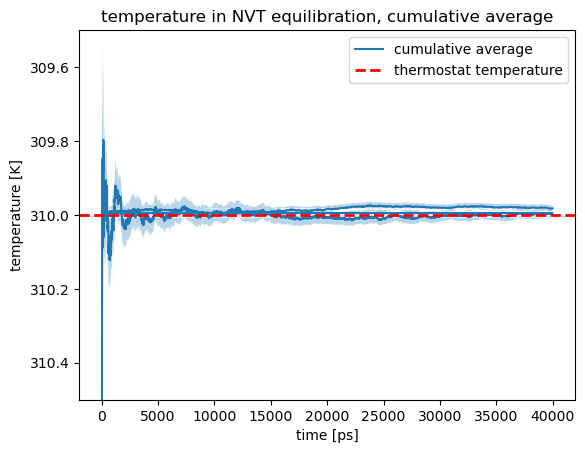

In [54]:
# plt.plot(tem_df[0], tem_df[1], label = "instantaneous values")
plt.plot(tem_df[0], tem_df[1].expanding().mean(), label = "cumulative average")
errors = np.sqrt(tem_df[1].expanding().var() / tem_df[1].expanding().count())
plt.fill_between(tem_df[0], tem_df[1].expanding().mean() + errors, tem_df[1].expanding().mean() - errors, alpha=0.3)
plt.title("temperature in NVT equilibration, cumulative average")
plt.xlabel("time [ps]")
plt.ylabel("temperature [K]")
plt.ylim(310.5, 309.5)
plt.axhline(y=310, color='r', linestyle='--', linewidth=2, label = "thermostat temperature")
plt.legend()
plt.show()

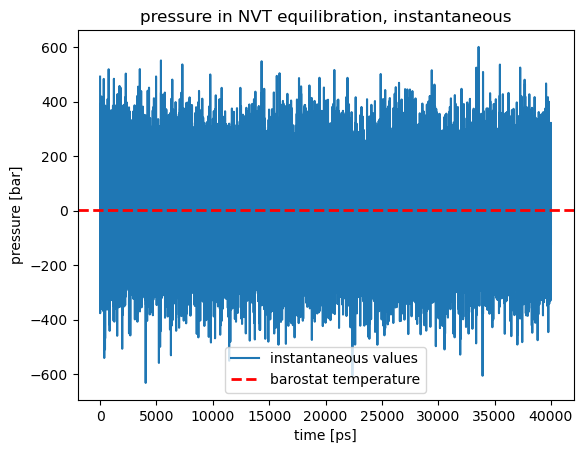

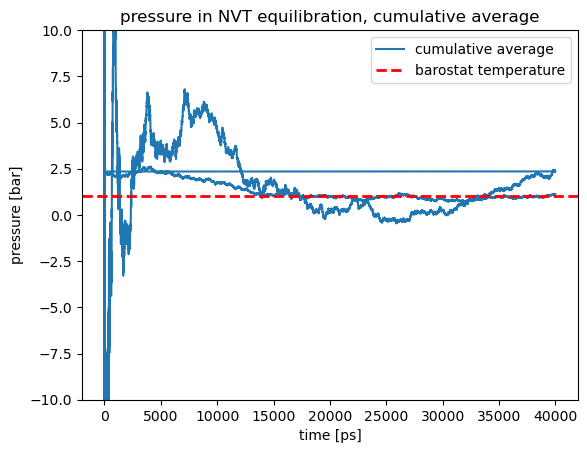

In [44]:
plt.plot(tem_df[0], tem_df[2], label = "instantaneous values")
# plt.plot(tem_df[0], tem_df[2].expanding().mean(), label = "cumulative average")
plt.title("pressure in NVT equilibration, instantaneous")
plt.xlabel("time [ps]")
plt.ylabel("pressure [bar]")
plt.axhline(y=1, color='r', linestyle='--', linewidth=2, label = "barostat temperature")
plt.legend()
plt.show()

# plt.plot(tem_df[0], tem_df[2], label = "instantaneous values")
plt.plot(tem_df[0], tem_df[2].expanding().mean(), label = "cumulative average")
#errors = np.sqrt(tem_df[2].expanding().var() / tem_df[2].expanding().count())
#plt.fill_between(tem_df[0], tem_df[2].expanding().mean() + errors, tem_df[2].expanding().mean() - errors, alpha=0.3)
plt.title("pressure in NVT equilibration, cumulative average")
plt.xlabel("time [ps]")
plt.ylabel("pressure [bar]")
plt.axhline(y=1, color='r', linestyle='--', linewidth=2, label = "barostat temperature")
plt.legend()
plt.ylim(-10,10)
plt.show()

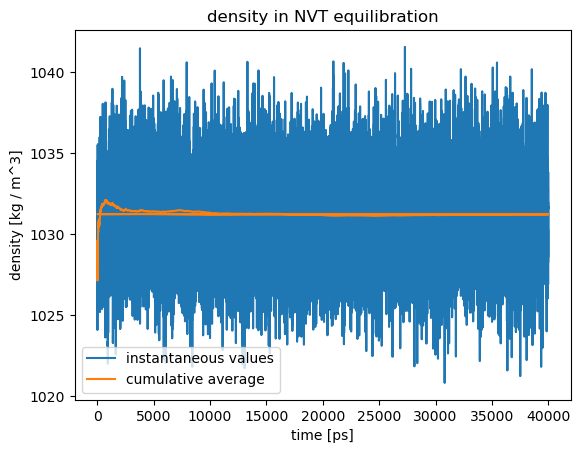

In [45]:
plt.plot(tem_df[0], tem_df[4], label = "instantaneous values")
plt.plot(tem_df[0], tem_df[4].expanding().mean(), label = "cumulative average")
plt.title("density in NVT equilibration")
plt.xlabel("time [ps]")
plt.ylabel("density [kg / m^3]")
# plt.axhline(y=310, color='r', linestyle='--', linewidth=2, label = "thermostat temperature")
plt.legend()
plt.show()